In [1]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importing bollywood Dataset and looking at the data:

In [2]:
bollywood = pd.read_csv("bollywood.csv")

bollywood.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736


Importing bollywood2 Dataset and looking at the data:

In [3]:
bollywood2 = pd.read_csv("bollywood - 2.csv")

bollywood2.head()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1


Looking at both the data sets, we can see that the columns names are different though they signify the same thing. Renaming the columns on the both the datasets to match so that they can be analysed further and used together.

In [4]:
bollywood.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes'],
      dtype='object')

In [5]:
bollywood2.columns = ['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes']

bollywood2.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1


Now these datasets have the same columns. Understanding the elements of each of the datasets:

In [6]:
bollywood.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           1
YoutubeDislikes        3
YoutubeLikeDislikes    0
dtype: int64

We see that there are null values in YoutubeDislikes and YoutubeLikes

In [7]:
bollywood2.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
dtype: int64

There are no null values on bollywood2. So no Additional Validations required.

In [8]:
bollywood.dtypes

No                       int64
RelDate                 object
MovieName               object
ReleaseTime              int64
Genre                   object
Budget                  object
BoxOfficeCollection     object
YoutubeViews             int64
YoutubeLikes           float64
YoutubeDislikes        float64
YoutubeLikeDislikes      int64
dtype: object

In [9]:
bollywood2.dtypes

No                       int64
RelDate                 object
MovieName               object
ReleaseTime             object
Genre                   object
Budget                   int64
BoxOfficeCollection    float64
YoutubeViews             int64
YoutubeLikes             int64
YoutubeDislikes          int64
dtype: object

Changing the columns to appropriate data types across both the datasets

Ideally:
    1. RelDate needs to be a Date Field.
    2. MovieName, Genre are String Values.
    3. Budget, BoxOfficeCollection are Floats.
    4. YoutubeViews, YoutubeLikes, YoutubeDislikes and YoutubeLikeDislikes are all integers.
    5. ReleaseTime is kind of an ennumerator

Working with each of the fields to understand if there are any issues:

## Working with Release Date Field:

Attempting the convert the Date Field into standard values.

Running the below code results in an exception.

In [10]:
#bollywood['FormattedRelDate'] = pd.to_datetime(bollywood['RelDate'])

Doing this we encounter an exception as seen above. This indicates that the string formatting is wrong in the provided dataset. This has to be corrected for all the elements in the dataset.

Note: The code is intentionally commented to be able to run all cells.

Further understanding the data by splitting the dates to year, month and dates.

In [11]:
bollywood['MonthOfRel'] = bollywood['RelDate'].str[:3]
bollywood['DateOfRel'] = bollywood['RelDate'].str[4:6]
bollywood['YearOfRel'] = bollywood['RelDate'].str[-4:]

In [12]:
bollywood.groupby(['DateOfRel'])['No'].count()

DateOfRel
09    1
1-    2
10    1
11    3
12    1
13    1
14    2
15    4
18    6
19    2
2-    2
20    1
21    2
22    2
23    1
24    2
25    2
27    1
28    1
30    1
4-    3
6-    2
7-    3
8-    4
9-    1
Name: No, dtype: int64

Inspecting the dates, they are not having any invalid characters. These need not have any further filteration.

In [13]:
bollywood.groupby(['YearOfRel'])['No'].count()

YearOfRel
-204     1
2013    19
2014    31
Name: No, dtype: int64

Looking at the above dataset we see the following incorrectly entered data years:
    1. 204
It should have been 2014 as the data is between 2013-2015.
Identifying the specific sample:    

In [14]:
bollywood[bollywood.YearOfRel.isin(['-204'])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel
34,35,Feb-21-204,Highway,4,Drama,30Cr,27.25,3043012,9100.0,971.0,10071,Feb,21,-204


Correcting the dataset by replacing the value by a correct value.

In [15]:
bollywood.RelDate = bollywood.RelDate.replace(to_replace=r'204', value='2014', regex=True)

In [16]:
bollywood.groupby(['MonthOfRel'])['No'].count()

MonthOfRel
Apr     1
Aug     1
Feb     9
Jan    10
Jul     6
Jum     1
Jun     3
Mar     7
May     5
Nov     2
Oct     2
Sep     2
Sqp     1
juu     1
Name: No, dtype: int64

Looking at the above dataset we see the following incorrectly entered data months:
    1. Jum
    2. Sqp
    3. juu
    
There are two ways of resolving this data issue:
    1. Assuming the typos based on character sequence and the wrongly placed character. eg: Jum is Jun with 'm' entered instead of 'n'. Similarly Sqp is Sep.
    2. However, we cannot get conclude if juu is Jun ot Jul
    3. Alternatively, we can look at the details of the movie to get the exact information to fill this as this dataset is available publicly.

Since Sqp and Jum can be corrected through (1), we can use that. For (2) I am using internet as the reference to fill the data element.

In [17]:
bollywood[bollywood.MonthOfRel.isin(['juu'])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel
17,18,juu-6-2014,Filmistaan,2,ComedyGenre,10Cr,6,989096,1608.0,173.0,1781,juu,6-,2014


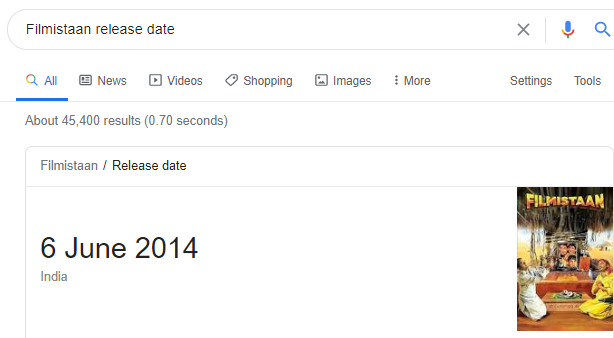

This confirms, filmistaan released in the month of Jun. Making the appropriate corrections across the bollywood dataset

In [18]:
bollywood[bollywood.MonthOfRel.isin(['Jum'])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel
12,13,Jum-27-2014,Ek Villain,2,RomanceGenre,35Cr,105.5,4518748,13558.0,1094.0,14652,Jum,27,2014


In [19]:
bollywood[bollywood.MonthOfRel.isin(['Sqp'])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel
6,7,Sqp-19-2014,Daawat-E-Ishq,4,ComedyGenre,30Cr,24.6,3905050,8315.0,1373.0,9688,Sqp,19,2014


In [20]:
bollywood.RelDate = bollywood.RelDate.replace(to_replace=r'juu', value='Jun', regex=True)
bollywood.RelDate = bollywood.RelDate.replace(to_replace=r'Jum', value='Jun', regex=True)
bollywood.RelDate = bollywood.RelDate.replace(to_replace=r'Sqp', value='Sep', regex=True)
#bollywood.RelDate = bollywood.RelDate.replace("Sqp-19-2014", "Sep-19-2014")
#bollywood.head()

These replacements are done, creating another column for storing this formatted date value so that original can be referred to incase of any issues that we might detect.

In [21]:
bollywood['FormattedRelDate'] = pd.to_datetime(bollywood['RelDate'])
bollywood.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel,FormattedRelDate
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,Apr,18,2014,2014-04-18
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,Jan,4-,2013,2013-01-04
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,Jul,18,2014,2014-07-18
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,Jan,4-,2013,2013-01-04
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,Jul,4-,2014,2014-07-04


Dropping Columns created for validations

In [22]:
bollywood = bollywood.drop(['MonthOfRel', 'DateOfRel', 'YearOfRel'], axis = 1)
bollywood.head(1)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,2014-04-18


Applying the same checks on the bollywood2 dataset:

Attempting to format the data field directly to change to a standard format:

In [23]:
bollywood2['FormattedRelDate'] = pd.to_datetime(bollywood2['RelDate'])
bollywood2.head(1)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,FormattedRelDate
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.5,3998331,2307,497,2014-07-04


We see that the formatting is successful and there are no issues here.

## Working with Genre Field:

Looking at the distribution by grouping them by Genres

In [24]:
bollywood.groupby(['Genre'])['No'].count()

Genre
 Drama           1
 DramaGenre     11
Action           1
ActionGenre      9
ComedyGenre     12
RomanceGenre     9
Thriller         5
Thriller         3
Name: No, dtype: int64

In [25]:
bollywood2.groupby(['Genre'])['No'].count()

Genre
 Drama      23
Action      14
Comedy      24
Romance     17
Thriller    21
Name: No, dtype: int64

The following are the issues that we see:
    1. Drama has a space before the text on both the datasets
    2. Thriller and Action have a trailing space at the end of the text in bollywood dataset
    3. ActionGenre, ComedyGenre and RomanceGenre have 'Genre' appended to the end.
    4. DramaGenre has a leading space and 'Genre' appended to the end.
Removing these irregularities.

In [26]:
bollywood.Genre = bollywood.Genre.str.strip()
bollywood.Genre = bollywood.Genre.replace("ActionGenre", "Action")
bollywood.Genre = bollywood.Genre.replace("ComedyGenre", "Comedy")
bollywood.Genre = bollywood.Genre.replace("RomanceGenre", "Romance")
bollywood.Genre = bollywood.Genre.replace("DramaGenre", "Drama")
bollywood2.Genre = bollywood2.Genre.str.strip()

Confirming that this has removed the irregularities:

In [27]:
bollywood.groupby(['Genre'])['No'].count()

Genre
Action      10
Comedy      12
Drama       12
Romance      9
Thriller     8
Name: No, dtype: int64

In [28]:
bollywood2.groupby(['Genre'])['No'].count()

Genre
Action      14
Comedy      24
Drama       23
Romance     17
Thriller    21
Name: No, dtype: int64

## Looking at Budget and BoxOfficeCollection:

In [29]:
#bollywood.groupby(['Budget'])['No'].count() #uncomment and run this.

In [30]:
#bollywood2.groupby(['Budget'])['No'].count() #uncomment and run this.

Looking Budget we see the following issues:
1. Budget column in bollywood2 has no issues but is all in interger values. This has to be converted to floats.
2. Modifying the bollywood data set to match this result set.

In [31]:
bollywood2['Budget'] = pd.to_numeric(bollywood2['Budget'], downcast='float')
bollywood['Budget'] = bollywood['Budget'].replace(to_replace=r'Cr', value='', regex=True)
bollywood['Budget'] = pd.to_numeric(bollywood['Budget'], downcast='float')

In [32]:
#bollywood.groupby(['Budget'])['No'].count() #uncomment and run this.

In [33]:
#bollywood.groupby(['BoxOfficeCollection'])['No'].count() #uncomment and run this.

In [34]:
#bollywood2.groupby(['BoxOfficeCollection'])['No'].count()#uncomment and run this.

There are basically two issues here with BoxOfficeCollection:
    1. Data Type is not consistent. BoxOfficeCollection on bollywood2 should be converted to float.
    2. bollywood dataset has 'cr' appended in some cases which is causing the data to not be in a standard format.

In [35]:
bollywood2['BoxOfficeCollection'] = pd.to_numeric(bollywood2['BoxOfficeCollection'], downcast='float')
bollywood['BoxOfficeCollection'] = bollywood['BoxOfficeCollection'].replace(to_replace=r'Cr', value='', regex=True)
bollywood['BoxOfficeCollection'] = pd.to_numeric(bollywood['BoxOfficeCollection'], downcast='float')

## Working with YoutubeLikes and YoutubeDislikes:

YoutubeLikes:
1. We know there is a null value in YoutubeLikes only in bollywood dataset. The other dataset is fine.
2. Getting the row where the null value exists:

In [36]:
bollywood[bollywood.YoutubeLikes.isin([np.nan])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate
39,40,Jun-20-2014,Humshakals,2,Comedy,75.0,63.700001,6280868,NaN,1.0,2,2014-06-20


LikesDislikes contains the sum of Likes and Dislikes for a row. So the value of NaN in Youtube Likes can be obtained from YoutubeLikeDislikes - YoutubeDislikes

In [37]:
bollywood['YoutubeLikes'] = bollywood['YoutubeLikes'].fillna(bollywood['YoutubeLikeDislikes']- bollywood['YoutubeDislikes'])
#confirming the null value in YoutubeLikes is replaced
bollywood.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        3
YoutubeLikeDislikes    0
FormattedRelDate       0
dtype: int64

Youtube Dislikes:
    1. We know there are 3 null values in Youtube Dislikes in Bollywood Dataset.

Identifying the rows where there are null values:

In [38]:
bollywood[bollywood.YoutubeDislikes.isin([np.nan])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate
9,10,Jan-11-2013,Gangoobai,4,Drama,2.0,0.01,4354,1.0,NaN,2,2013-01-11
31,32,Feb-15-2013,Murder 3,1,Thriller,12.0,25.00,2249055,1879.0,NaN,2626,2013-02-15
46,47,Mar-15-2013,Mere Dad Ki Maruti,4,Comedy,5.0,11.00,569711,1226.0,NaN,1359,2013-03-15


In [39]:
bollywood['YoutubeDislikes'] = bollywood['YoutubeDislikes'].fillna(bollywood['YoutubeLikeDislikes']- bollywood['YoutubeLikes'])
#confirming the null value in YoutubeLikes is replaced
bollywood.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
YoutubeLikeDislikes    0
FormattedRelDate       0
dtype: int64

Identifying any other issues on the Datasets:

In [40]:
bollywood.describe()

,No,ReleaseTime,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,26.000000,4.137255,27.941177,60.988823,3.504813e+06,8607.549020,1265.372549,9872.921569
std,14.866069,5.779341,27.754934,91.514565,3.547764e+06,15343.365202,2084.735916,17190.943468
min,1.000000,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000,2.000000
25%,13.500000,2.500000,10.000000,10.125000,1.059242e+06,1463.500000,150.500000,1683.500000
50%,26.000000,4.000000,18.000000,27.160000,2.375050e+06,3308.000000,556.000000,3773.000000
75%,38.500000,4.000000,35.000000,67.000000,5.008115e+06,11578.500000,1512.000000,12991.500000
max,51.000000,44.000000,125.000000,383.000000,1.898622e+07,101275.000000,10269.000000,111341.000000


In [41]:
bollywood2.describe()

,No,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000
mean,100.000000,30.080809,56.253941,3.258616e+06,7445.202020,1170.989899
std,28.722813,28.485828,101.429230,3.479723e+06,11187.769162,1722.899736
min,51.000000,2.000000,0.240000,5.142000e+03,1.000000,1.000000
25%,75.500000,12.000000,8.390000,1.140044e+06,1099.000000,261.500000
50%,100.000000,22.000000,29.000000,2.501277e+06,4111.000000,628.000000
75%,124.500000,35.000000,55.000000,4.185784e+06,8589.000000,1378.000000
max,149.000000,150.000000,735.000000,2.317107e+07,72070.000000,11888.000000


We see that the YoutubeLikeDislikes is missing in bollywood2 dataset. Adding that column:

In [42]:
bollywood2['YoutubeLikeDislikes'] = bollywood2['YoutubeDislikes']+ bollywood2['YoutubeLikes']

## Working with ReleaseTime:

In [43]:
bollywood.groupby(['ReleaseTime'])['No'].count()

ReleaseTime
1      3
2     10
3      4
4     33
44     1
Name: No, dtype: int64

In [44]:
bollywood2.groupby(['ReleaseTime'])['No'].count()

ReleaseTime
FS    14
HS     8
LW    11
N     66
Name: No, dtype: int64

There are essentially two issues here:
    1. An incorrect value in bollywood data set which has a ReleaseTime as 44
    2. The ReleaseTime values are different in the case of both the datasets

In [45]:
bollywood.ReleaseTime = bollywood.ReleaseTime.replace(44,4)
#Replacing 44 with 4

In [46]:
bollywood.groupby(['ReleaseTime'])['No'].count()

ReleaseTime
1     3
2    10
3     4
4    34
Name: No, dtype: int64

From the Problem Statement we understand that:
    1. Release time of movie like Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)
    2. Comparing this with strings with data elements in bollywood2, we can infer that LW = Long Weekend, FS = Festive Season, HS=Holiday Season and N = Normal
    3. The data is now converted to the given Types of ReleaseTimes as described in (1)

Replacing data elements on bollywood2 to match with that of bollywood

In [47]:
bollywood.ReleaseTime = bollywood.ReleaseTime.replace(1,"Festive Season")
bollywood.ReleaseTime = bollywood.ReleaseTime.replace(2,"Holiday Season")
bollywood.ReleaseTime = bollywood.ReleaseTime.replace(3,"Long Weekend")
bollywood.ReleaseTime = bollywood.ReleaseTime.replace(4,"Normal")
bollywood2.ReleaseTime = bollywood2.ReleaseTime.replace('FS',"Festive Season")
bollywood2.ReleaseTime = bollywood2.ReleaseTime.replace('HS',"Holiday Season")
bollywood2.ReleaseTime = bollywood2.ReleaseTime.replace('LW',"Long Weekend")
bollywood2.ReleaseTime = bollywood2.ReleaseTime.replace('N',"Normal")

In [48]:
bollywood2.groupby(['ReleaseTime'])['No'].count()
#Confirming that both the datasets have the same value sets for ReleaseTime

ReleaseTime
Festive Season    14
Holiday Season     8
Long Weekend      11
Normal            66
Name: No, dtype: int64

## Looking at Youtube Views:

In [49]:
#bollywood.groupby(['YoutubeViews'])['No'].count() #Uncomment this to run this code, commented to reduce the size of notebook

In [50]:
#bollywood2.groupby(['YoutubeViews'])['No'].count() #Uncomment this to run this code, ommented to reduce the size of notebook

Looking at the Youtube Views on both the datasets we can see that there are no data quality issues with the dataset.

## Merging the two datasets:

In [51]:
merged_bollywood = [bollywood, bollywood2]
dataset = pd.concat(merged_bollywood)
dataset.shape

(150, 12)

Validating the data on the merged data set by looking for nulls:

In [52]:
dataset.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
YoutubeLikeDislikes    0
FormattedRelDate       0
dtype: int64

There are no null values. Also we see there are 150 rows.

## Checking for Duplicate Values in the dataset

Movie Names cannot be exact duplicates

In [53]:
dataset.shape

(150, 12)

Grouping the movies by name:

In [54]:
distinct_movies = dataset.groupby(['MovieName'])['Budget'].count().reset_index().rename(columns={"Budget":"Occurrences"})

In [55]:
distinct_movies.shape

(149, 2)

We see that there is a difference of one, this would mean that there is one such value which is a duplicate. Sorting the above by descendening and identifying the duplicate record.

In [56]:
distinct_movies.sort_values(by=['Occurrences'], inplace=True, ascending=False)

In [57]:
distinct_movies.head(1)

,MovieName,Occurrences
82,Lekar Hum Deewana Dil,2


We can see that there is a duplicate entry in the movie names. Exploring the other other attributes of this movie.

In [58]:
dataset[dataset.MovieName.isin(['Lekar Hum Deewana Dil'])]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate
50,51,Jul-7-2014,Lekar Hum Deewana Dil,Normal,Romance,16.0,2.5,3998331,2307.0,497.0,2804,2014-07-07
0,51,4-Jul-14,Lekar Hum Deewana Dil,Normal,Romance,16.0,2.5,3998331,2307.0,497.0,2804,2014-07-04


We see all of the other attributes are a match, thus, removing one of the occurrence.

In [59]:
dataset = dataset.drop_duplicates(subset=['MovieName'])

## Q1. Summary of Issues:
The following are the issues that have been identified and recitified during the data preparation process:
    1. Issues with Release Date:
        a. There are three dates with incorrect month names. These are replaced with the correct names.
        b. There is an year which is incorrectly entered. This is also corrected by replacing it with the correct value.
        c. A formatted date field column  is also created for different types of analytical uses. Original field if leftout with alteration.
    2. Issues with Genre field:
        a. Drama has a space before the text on both the datasets
        b. Thriller and Action have a trailing space at the end of the text in bollywood dataset
        c. ActionGenre, ComedyGenre and RomanceGenre have 'Genre' appended to the end.
        d. DramaGenre has a leading space and 'Genre' appended to the end.
        Leading and Trailing spaces have been removed and where ever 'Genre' is appended to the end, that is removed.
    3. Issues with Budget Field:
        a. Data Type is not consistent across the datasets.
        b. bollywood dataset has 'cr' appended in some cases which is causing the data to not be in a standard format.
    4. Issues with BoxOfficeColleciton Field:
        a. Data Type is not consistent across the datasets.
        b. bollywood dataset has 'cr' appended in some cases which is causing the data to not be in a standard format.
    5. Issues with ReleaseTime:
        a. A value is incorrectly entered in bollywood dataset. This is manually corrected as it is only one value.
        b. The values are not consistent between the two datasets. These have been replaced with the standard values from the Assignment Problem Statement.
    6. Issues with YoutubeLikes Field:
        a. One Null Value in YoutubeLikes in the bollywood dataset. 
        b. This has been rectified by the use of the additional column that is provided as YoutubeLikeDislikes. This column contains the sum of likes and dislikes. Using this information, we have replaced the null value in YoutubeLikes with a value that is equal to YoutubeLikeDislikes - YoutubeDislikes from that specific row.
    7. Issues with YoutubeDislikes Field:
        a. There are three null values in YoutubeDislikes in bollywood dataset. 
        b. These values also can be obtained as a difference between YoutubeLikeDislikes and YoutubeLikes.
    8. Once the data is cleaned on both the datasets and the datasets are merged we see that there is a movie with duplicate entries. One of these is removed.

## Q2: Meta Information of the Dataset

In [60]:
dataset.info()#MetaInfo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 98
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   149 non-null    int64         
 1   RelDate              149 non-null    object        
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    float32       
 6   BoxOfficeCollection  149 non-null    float32       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    float64       
 9   YoutubeDislikes      149 non-null    float64       
 10  YoutubeLikeDislikes  149 non-null    int64         
 11  FormattedRelDate     149 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float32(2), float64(2), int64(3), object(4)
memory usage: 14.0+ KB


There are a total of 149 entries in the dataset.

## Q3. Movies in each Genre per ReleaseTime

In [61]:
Genre_ReleaseTime = dataset.groupby(['Genre','ReleaseTime'])['Budget'].count().reset_index().rename(columns={"Budget":"Occurrences"})
Genre_ReleaseTime.sort_values(by=['Genre'], inplace=True, ascending=False)
#Genre_ReleaseTime

In [62]:
pivot = Genre_ReleaseTime.pivot_table(index=['Genre'], columns = 'ReleaseTime', values=['Occurrences'], aggfunc='sum')
pivot

Occurrences                                   
ReleaseTime Festive Season Holiday Season Long Weekend Normal
Genre                                                        
Action                   3              3            3     15
Comedy                   3              5            5     23
Drama                    4              6            1     24
Romance                  3              3            4     15
Thriller                 4              1            2     22

The above is the distribution for Movies that are released in each Genre for each of the ReleaseTime.

## Q4. Month of the year where maximum movie releases are seen

In [63]:
dataset['yearOfRelease'], dataset['monthOfRelease'] = dataset['FormattedRelDate'].dt.year,dataset['FormattedRelDate'].dt.month

In [64]:
Month_Year = dataset.groupby(['yearOfRelease','monthOfRelease'])['Budget'].count().reset_index().rename(columns={"Budget":"Occurrences"})
Month_Year_max = Month_Year.loc[Month_Year.groupby(["yearOfRelease"])["Occurrences"].idxmax()]
Month_Year_max.sort_values(by=['Occurrences'], inplace=True, ascending=False)
Month_Year_max

,yearOfRelease,monthOfRelease,Occurrences
15,2014,5,12
6,2013,7,9
23,2015,1,5


We can see that the year 2014 and Month 5 (May) has the most number of releases followed by July 2013 with 9 Releases and January 2015 with 5 releases.

## Q5. Month of the year where we see high budgeted movies

High Budgeted movies are the ones with budgets over 25 crs. Creating a column that holds this value.

In [65]:
dataset['HighBudgetMovies'] = np.where((dataset['Budget'] >= 25), 'High Budget', 'Low Budget')

dataset.head(1)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,yearOfRelease,monthOfRelease,HighBudgetMovies
0,1,Apr-18-2014,2 States,Long Weekend,Romance,36.0,104.0,8576361,26622.0,2527.0,29149,2014-04-18,2014,4,High Budget


Understanding the general spread of High Budget Movies across all years.

In [70]:
Month_Year_Budget = dataset.groupby(['yearOfRelease','monthOfRelease','HighBudgetMovies'])['Budget'].count().reset_index().rename(columns={"Budget":"Occurrences"})
Month_Year_Budget_HighBudget = Month_Year_Budget[Month_Year_Budget.HighBudgetMovies.isin(['High Budget'])]
Month_Year_Budget_HighBudget.sort_values(by=['yearOfRelease','Occurrences'], inplace=True, ascending=False)
Month_Year_Budget_HighBudget['ConcatVal'] = Month_Year_Budget_HighBudget["yearOfRelease"].astype(str)+":"+Month_Year_Budget_HighBudget["Occurrences"].astype(str)

Month_Year_Budget_HighBudget

,yearOfRelease,monthOfRelease,HighBudgetMovies,Occurrences,ConcatVal
43,2015,1,High Budget,3,2015:3
45,2015,2,High Budget,2,2015:2
47,2015,3,High Budget,1,2015:1
22,2014,2,High Budget,4,2014:4
24,2014,3,High Budget,4,2014:4
26,2014,4,High Budget,4,2014:4
20,2014,1,High Budget,3,2014:3
30,2014,6,High Budget,3,2014:3
34,2014,8,High Budget,3,2014:3
40,2014,11,High Budget,3,2014:3


We see that the year 2014 has three months that have the same results. Retaining all the results:

In [67]:
Month_Year_Budget_HighBudget_max = Month_Year_Budget_HighBudget.loc[Month_Year_Budget_HighBudget.groupby(["yearOfRelease"])["Occurrences"].idxmax()]
Month_Year_Budget_HighBudget_max.sort_values(by=['Occurrences'], inplace=True, ascending=False)
Summarized_Budget = Month_Year_Budget_HighBudget_max[['yearOfRelease','Occurrences']]
Summarized_Budget['ConcatVal'] = Summarized_Budget["yearOfRelease"].astype(str)+":"+Summarized_Budget["Occurrences"].astype(str)
Summarized_Budget
budget_result = pd.merge(Summarized_Budget, Month_Year_Budget_HighBudget, on=['ConcatVal'])
budget_result[['yearOfRelease_x','monthOfRelease','Occurrences_y']]

,yearOfRelease_x,monthOfRelease,Occurrences_y
0,2013,7,5
1,2014,2,4
2,2014,3,4
3,2014,4,4
4,2015,1,3


We can see that the year 2013 and Month 7 (July) has the most number of high budget releases that is 5 followed by February, Match and April of 2014 with 4 Releases and January 2015 with 3 releases.

## Q6. Top 10 movies with max ROI:

Calculation for ROI:

ROI = (Box Office Collection - Budget)/ Budget

In [68]:
dataset['ROI'] = (dataset['BoxOfficeCollection'] - dataset['Budget'])/dataset['Budget']

dataset.head(1)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,yearOfRelease,monthOfRelease,HighBudgetMovies,ROI
0,1,Apr-18-2014,2 States,Long Weekend,Romance,36.0,104.0,8576361,26622.0,2527.0,29149,2014-04-18,2014,4,High Budget,1.888889


In [69]:
HighROI  = dataset[['MovieName','FormattedRelDate','ROI']]
HighROI.sort_values(by=['ROI'], inplace=True, ascending=False)
HighROI.head(10)

,MovieName,FormattedRelDate,ROI
3,Rajdhani Express,2013-01-04,53.714287
14,Aashiqui 2,2013-04-26,8.166667
39,PK,2014-12-19,7.647059
82,Grand Masti,2013-09-13,7.514286
85,The Lunchbox,2013-09-20,7.500000
37,Fukrey,2013-06-14,6.240000
8,Mary Kom,2014-09-05,5.933333
78,Shahid,2013-10-18,5.666667
37,Humpty Sharma Ki Dulhania,2014-07-11,5.500000
51,Bhaag Milkha Bhaag,2013-07-12,4.466667
